<빅데이터 플랫폼 요구사항 분석>
--

Bike Sharing Demand
--

In [ ]:
from google.colab import files
files.upload()

In [7]:
import pandas as pd

train=pd.read_csv('train.csv', parse_dates=['datetime'])
test=pd.read_csv('test.csv', parse_dates=['datetime'])
sub=pd.read_csv('sampleSubmission.csv')

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost
import lightgbm
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.preprocessing import LabelEncoder

In [12]:
#!pip install catboost

In [13]:
import catboost

1번 문제: [하] datetime의 속성을 slicing이 가능하게 바꾸시오.
--

In [14]:
train.head(3), train.tail(3)

(             datetime  season  holiday  ...  casual  registered  count
 0 2011-01-01 00:00:00       1        0  ...       3          13     16
 1 2011-01-01 01:00:00       1        0  ...       8          32     40
 2 2011-01-01 02:00:00       1        0  ...       5          27     32
 
 [3 rows x 12 columns],
                  datetime  season  holiday  ...  casual  registered  count
 10883 2012-12-19 21:00:00       4        0  ...       4         164    168
 10884 2012-12-19 22:00:00       4        0  ...      12         117    129
 10885 2012-12-19 23:00:00       4        0  ...       4          84     88
 
 [3 rows x 12 columns])

In [15]:
test.head(3), test.tail(3)

(             datetime  season  holiday  ...   atemp  humidity  windspeed
 0 2011-01-20 00:00:00       1        0  ...  11.365        56    26.0027
 1 2011-01-20 01:00:00       1        0  ...  13.635        56     0.0000
 2 2011-01-20 02:00:00       1        0  ...  13.635        56     0.0000
 
 [3 rows x 9 columns],
                 datetime  season  holiday  ...   atemp  humidity  windspeed
 6490 2012-12-31 21:00:00       1        0  ...  12.880        60    11.0014
 6491 2012-12-31 22:00:00       1        0  ...  13.635        56     8.9981
 6492 2012-12-31 23:00:00       1        0  ...  13.635        65     8.9981
 
 [3 rows x 9 columns])

In [16]:
train['time'] = train['datetime'].dt.strftime('%Y%m%d')
train['year_month'] = train['datetime'].dt.strftime('%Y%m')
train['month_day'] = train['datetime'].dt.strftime('%m%d')
train['year']=train['datetime'].dt.strftime('%Y')
train['month']=train['datetime'].dt.strftime('%m')
train['date']=train['datetime'].dt.strftime('%d')
train['hour']=train['datetime'].dt.strftime('%H')
train['day']=train['datetime'].dt.strftime('%A')

test['time'] = test['datetime'].dt.strftime('%Y%m%d')
test['year_month'] = test['datetime'].dt.strftime('%Y%m')
test['month_day'] = test['datetime'].dt.strftime('%m%d')
test['year']=test['datetime'].dt.strftime('%Y')
test['month']=test['datetime'].dt.strftime('%m')
test['date']=test['datetime'].dt.strftime('%d')
test['hour']=test['datetime'].dt.strftime('%H')
test['day']=test['datetime'].dt.strftime('%A')

In [17]:
train['time'] =train['time'].astype(int)
train['year_month'] = train['year_month'].astype(int)
train['month_day'] = train['month_day'].astype(int)
train['year']=train['year'].astype(int)
train['month']=train['month'].astype(int)
train['date']=train['date'].astype(int)
train['hour']=train['hour'].astype(int)

test['time'] =test['time'].astype(int)
test['year_month'] = test['year_month'].astype(int)
test['month_day'] = test['month_day'].astype(int)
test['year']=test['year'].astype(int)
test['month']=test['month'].astype(int)
test['date']=test['date'].astype(int)
test['hour']=test['hour'].astype(int)

In [18]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,year_month,month_day,year,month,date,hour,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,20110101,201101,101,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,20110101,201101,101,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,20110101,201101,101,2011,1,1,2,Saturday


In [19]:
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time,year_month,month_day,year,month,date,hour,day
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,20110120,201101,120,2011,1,20,0,Thursday
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,20110120,201101,120,2011,1,20,1,Thursday
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,20110120,201101,120,2011,1,20,2,Thursday


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  time        10886 non-null  int64         
 13  year_month  10886 non-null  int64         
 14  month_day   10886 non-null  int64         
 15  year        10886 non-null  int64         
 16  month       10886 non-

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   time        6493 non-null   int64         
 10  year_month  6493 non-null   int64         
 11  month_day   6493 non-null   int64         
 12  year        6493 non-null   int64         
 13  month       6493 non-null   int64         
 14  date        6493 non-null   int64         
 15  hour        6493 non-null   int64         
 16  day         6493 non-nul

2번 문제 [하] barplot을 사용하여 일/월/년과 시간대 별로 count 수를 그려보시오.
--

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'hour')]

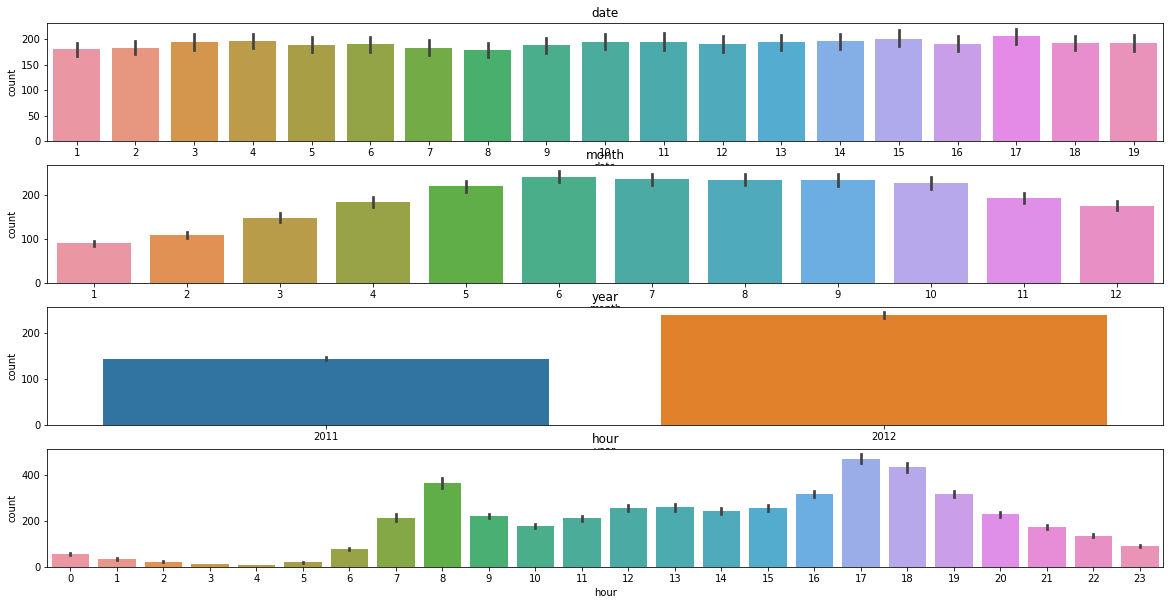

In [22]:
figure, ((ax1), (ax2), (ax3), (ax4)) =plt.subplots(nrows=4,ncols=1)
figure.set_size_inches(20,10)

sns.barplot(data=train, x="date", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="year", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)

sns.set_style("darkgrid")
ax1.set(ylabel='count', title ="date")
ax2.set(ylabel='count', title ="month")
ax3.set(ylabel='count', title ="year")
ax4.set(ylabel='count', title ="hour")

3번 문제: [중] 상관점수를 봐서 상관이 없어 보이는 것의 속성은 무엇인지 검증하시오.
--

In [23]:
train=train[['datetime', 'time', 'year_month', 'month_day',
             'year', 'month', 'date', 'hour',
       'day', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 
       'count']]

In [24]:
test=test[['datetime', 'time', 'year_month', 'month_day',
       'year', 'month', 'date', 'hour', 'day',
       'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed']]

In [25]:
le=LabelEncoder()
le.fit(train.day)
train['day']=le.transform(train.day)

In [26]:
le=LabelEncoder()
le.fit(test.day)
test['day']=le.transform(test.day)

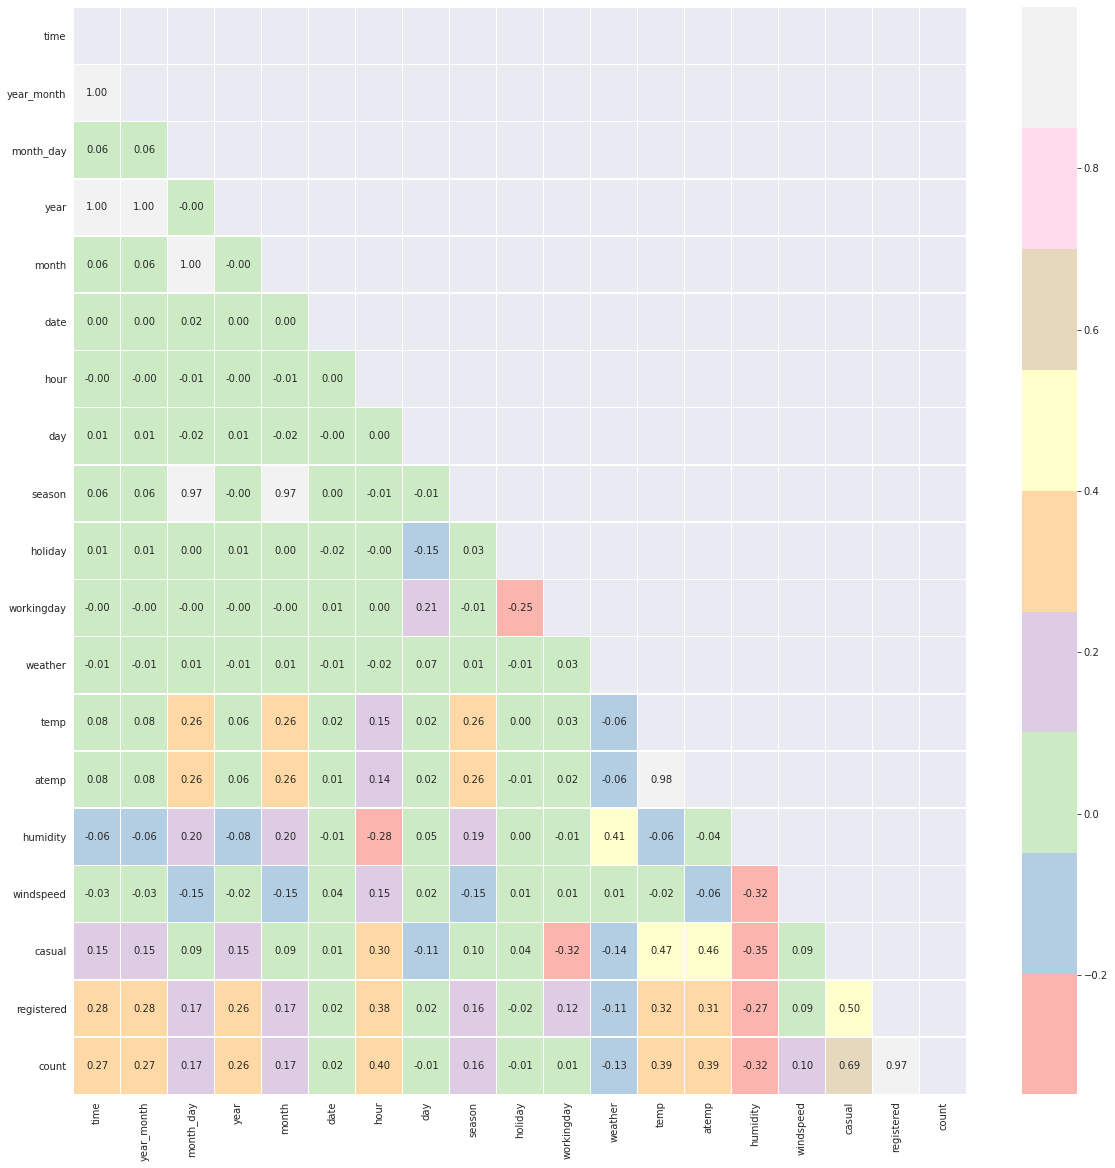

In [27]:
import numpy as np
plt.figure(figsize=(20,20))
mask = np.zeros_like(train.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=train.corr(), mask=mask, annot=True, fmt ='.2f', linewidths=.5, cmap='Pastel1')
plt.show()

- 상관관계를 보면 상관이 없어보이는 칼럼은 date(일), day(요일), holiday, workingday 으로 보여진다.

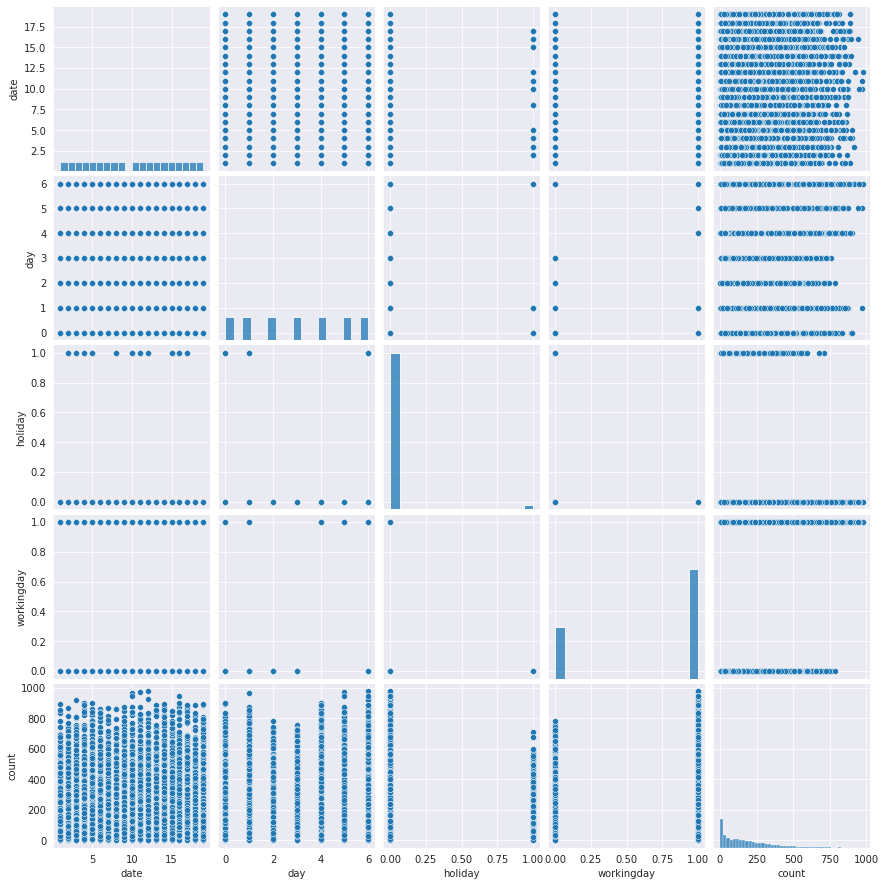

In [28]:
pair_1=train[['date','day','holiday', 'workingday', 'count']]
sns.pairplot(data=pair_1)

- pairplot으로 봐도 타겟인 count와 뚜렷한 상관관계가 없는 것으로 보여진다.

In [29]:
x=train.drop(['datetime','registered','count'], axis=1)
y=train['count']

In [30]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1209.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        05:20:06   Log-Likelihood:                -66936.
No. Observations:               10886   AIC:                         1.339e+05
Df Residuals:                   10871   BIC:                         1.340e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.202e+05   4441.005    -27.075      0.000   -1.29e+05   -1.12e+05
time           0.0060      0.000     27.018      0.000       0.006       0.006
year_month    -0.0020      0.002     -1.026      0.305      -0.006       0.002
month_day      0.0833      0.013      6.178      0.000       0.057       0.110
year       -1.071e-05   1.35e-06     -7.942      0.000   -1.34e-05   -8.07e-06
month         -0.0005      0.002     -0.256      0.798      -0.004       0.003
date           0.1347      0.199      0.677      0.499      -0.255       0.525
hour           5.0358      0.170     29.590      0.000       4.702       5.369
day            2.0067      0.565      3.550      0.000       0.899       3.115
season        -9.0822      4.147     -2.190      0.029     -17.210      -0.954
holiday       26.2926      6.842      3.843      0.000      12.880      39.705
workingday    85.1992      2.680     31.785      0.000      79.945      90.453
weather       -9.2496      1.920     -4.818      0.000     -13.012      -5.487
temp          -1.3093      0.833     -1.572      0.116      -2.942       0.323
atemp          1.5563      0.767      2.029      0.042       0.053       3.059
humidity      -0.2690      0.074     -3.639      0.000      -0.414      -0.124
windspeed      0.5308      0.146      3.633      0.000       0.244       0.817
casual         2.3404      0.030     78.121      0.000       2.282       2.399
==============================================================================
Omnibus:                     3783.528   Durbin-Watson:                   0.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13147.727
Skew:                           1.760   Prob(JB):                         0.00
Kurtosis:                       7.075   Cond. No.                     6.89e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.27e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

date, day, holiday, workingday의 p-value를 보면 0.499, 0.000, 0.000, 0.000이다. p-value가 0.05~0.005 사이가 검증하고자 하는 가설의 신뢰도가 높다라고 했을 때, date는 너무 높으며, day, holiday, workingday는 상관관계가 없다라고 볼 수 있다.

4번 문제: [상] 이상치 처리 방법을 2가지 이상 적용해보고 검증하시오.
--

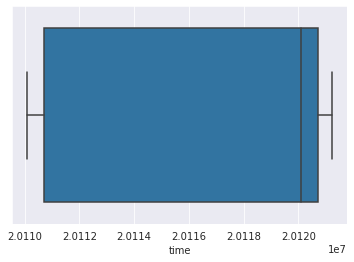

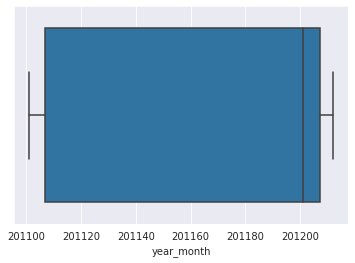

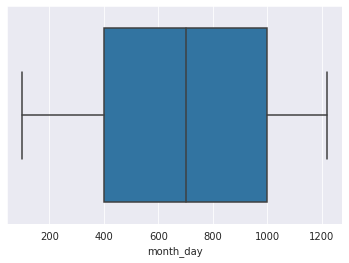

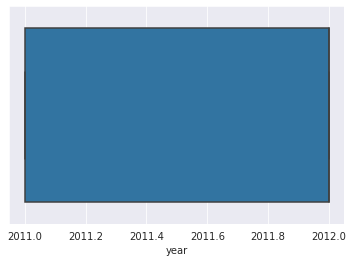

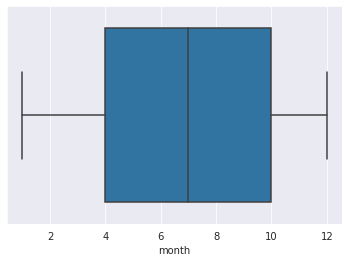

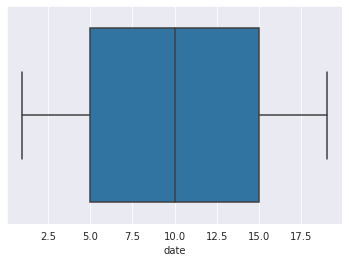

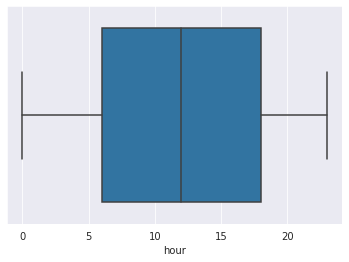

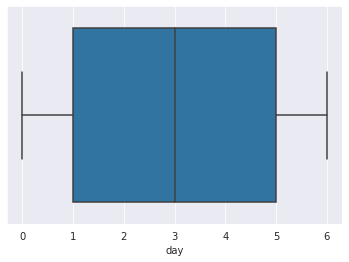

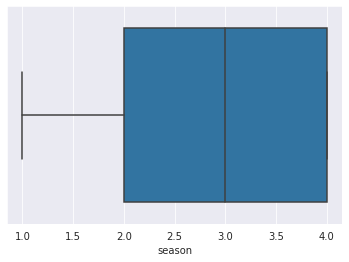

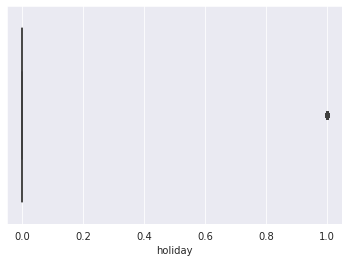

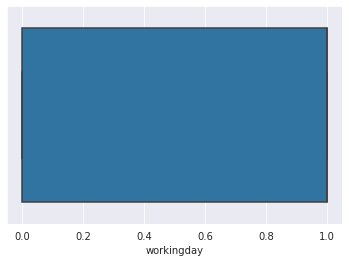

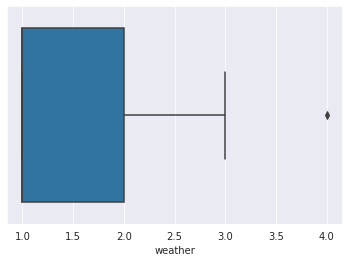

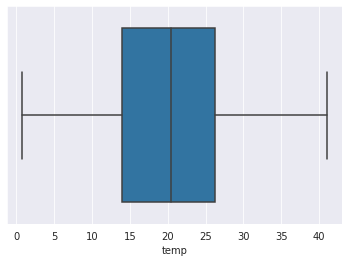

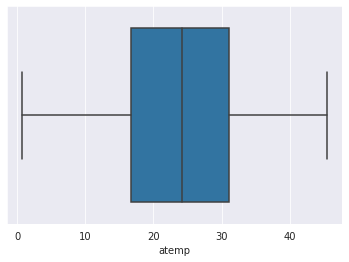

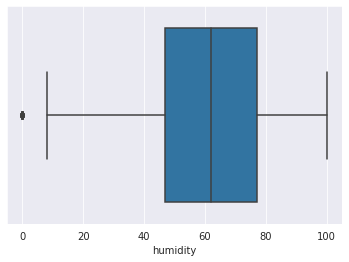

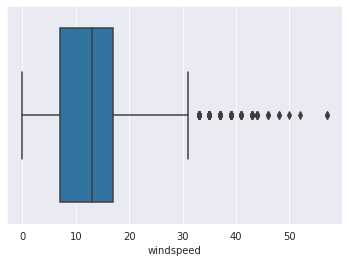

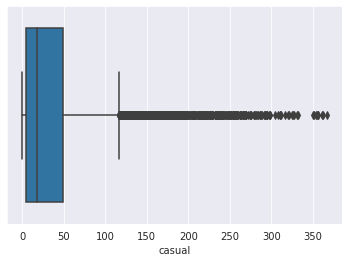

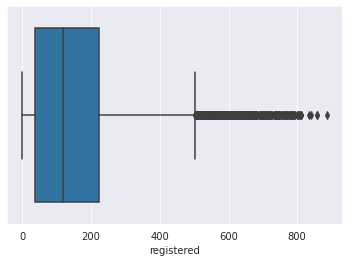

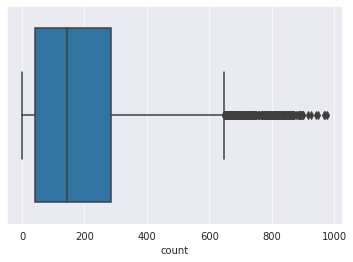

In [31]:
for i in range(1,20):
    sns.boxplot(x = train.iloc[:, i], orient = "v", data = train)
    sns.set_style("darkgrid")
    plt.show() 

holiday, weather, humidity, windspeed, casual, registered, count에서 이상치가 탐지됐다.

방법[1] IQR로 이상치 제거 전과 후로 모델 돌려보기
--

In [32]:
# 이상치 제거 함수
# IQR
def remove_outlier_test(d_cp, column):
    fraud_column_data=d_cp[column]
    quan_25=np.percentile(fraud_column_data.values, 25)
    quan_75=np.percentile(fraud_column_data.values, 75)

    iqr=quan_75-quan_25
    iqr=iqr*1.5
    lowest=quan_25-iqr
    highest=quan_75+iqr
    outlier_index=fraud_column_data[(fraud_column_data<lowest)|(fraud_column_data>highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis=0, inplace=True)
    print(d_cp.shape)
    return d_cp

이상치 제거 전

In [33]:
x=train[['time', 'year_month', 'month_day', 'year', 'month', 'date',
       'hour', 'day', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual']]
y=train['count']

In [34]:
class regression_select:
    def linear(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        lr=LinearRegression()
        lr.fit(x_train, y_train)
        y_pred=lr.predict(x_test)
        train_score=lr.score(x_train, y_train)
        test_score=lr.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def ridge(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        ridge = Ridge()
        ridge.fit(x_train, y_train)
        y_pred=ridge.predict(x_test)
        train_score=ridge.score(x_train, y_train)
        test_score=ridge.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def lasso(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        lasso = Lasso()
        lasso.fit(x_train, y_train)
        y_pred=lasso.predict(x_test)
        train_score=lasso.score(x_train, y_train)
        test_score=lasso.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def elasticnet(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        en = ElasticNet()
        en.fit(x_train, y_train)
        y_pred=en.predict(x_test)
        train_score=en.score(x_train, y_train)
        test_score=en.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def xgboost(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        xgb = xgboost.XGBRegressor()
        xgb.fit(x_train, y_train)
        y_pred=xgb.predict(x_test)
        train_score=xgb.score(x_train, y_train)
        test_score=xgb.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def lgbm(x,y):
         x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
         lgbm = lightgbm.LGBMRegressor()
         lgbm.fit(x_train, y_train)
         y_pred=lgbm.predict(x_test)
         train_score=lgbm.score(x_train, y_train)
         test_score=lgbm.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         return rmse, train_score, test_score

    def catboost(x,y):
         x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
         cb = catboost.CatBoostRegressor()
         cb.fit(x_train, y_train)
         y_pred=cb.predict(x_test)
         train_score=cb.score(x_train, y_train)
         test_score=cb.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         return rmse, train_score, test_score

In [35]:
class regression_model:
    def model_choice(x,y):
        model=pd.DataFrame(columns=['모델','rmse','train_score','test_score'])
        linear_rmse=regression_select.linear(x,y)[0]
        linear_train_score=regression_select.linear(x,y)[1]
        linear_test_score=regression_select.linear(x,y)[2]

        model=model.append({'모델':'linear', 'rmse':linear_rmse,
                            'train_score':linear_train_score,
                            'test_score':linear_test_score}, ignore_index=True)
    

        ridge_rmse=regression_select.ridge(x,y)[0]
        ridge_train_score=regression_select.ridge(x,y)[1]
        ridge_test_score=regression_select.ridge(x,y)[2]

        model=model.append({'모델':'ridge', 'rmse':ridge_rmse,
                            'train_score':ridge_train_score,
                            'test_score':ridge_test_score}, ignore_index=True)
        

        lasso_rmse=regression_select.lasso(x,y)[0]
        lasso_train_score=regression_select.lasso(x,y)[1]
        lasso_test_score=regression_select.lasso(x,y)[2]

        model=model.append({'모델':'lasso', 'rmse':lasso_rmse,
                            'train_score':lasso_train_score,
                            'test_score':lasso_test_score}, ignore_index=True)
        

        elasticnet_rmse=regression_select.elasticnet(x,y)[0]
        elasticnet_train_score=regression_select.elasticnet(x,y)[1]
        elasticnet_test_score=regression_select.elasticnet(x,y)[2]

        model=model.append({'모델':'elasticnet', 'rmse':elasticnet_rmse,
                            'train_score':elasticnet_train_score,
                            'test_score':elasticnet_test_score}, ignore_index=True)
        

        xgboost_rmse=regression_select.xgboost(x,y)[0]
        xgboost_train_score=regression_select.xgboost(x,y)[1]
        xgboost_test_score=regression_select.xgboost(x,y)[2]

        model=model.append({'모델':'xgboost', 'rmse':xgboost_rmse,
                            'train_score':xgboost_train_score,
                            'test_score':xgboost_test_score}, ignore_index=True)
        

        lgbm_rmse=regression_select.lgbm(x,y)[0]
        lgbm_train_score=regression_select.lgbm(x,y)[1]
        lgbm_test_score=regression_select.lgbm(x,y)[2]

        model=model.append({'모델':'lightgbm', 'rmse':lgbm_rmse,
                            'train_score':lgbm_train_score,
                            'test_score':lgbm_test_score}, ignore_index=True)
        

        catboost_rmse=regression_select.catboost(x,y)[0]
        catboost_train_score=regression_select.catboost(x,y)[1]
        catboost_test_score=regression_select.catboost(x,y)[2]

        model=model.append({'모델':'catboost', 'rmse':catboost_rmse,
                            'train_score':catboost_train_score,
                            'test_score':catboost_test_score}, ignore_index=True)
              
        model=model.sort_values('test_score', ascending=False)

        return model

In [ ]:
best=regression_model.model_choice(x,y)

In [37]:
best

,모델,rmse,train_score,test_score
6,catboost,26.445344,0.988115,0.978812
5,lightgbm,29.628746,0.983013,0.973404
4,xgboost,50.214547,0.922174,0.923607
1,ridge,111.407956,0.605031,0.623966
0,linear,111.408032,0.605031,0.623965
2,lasso,111.476503,0.604121,0.623503
3,elasticnet,114.112983,0.583065,0.605484


IQR 제거 이후 다시 시도해보기
--

In [38]:
iqr_train=train[['time', 'year_month', 'month_day', 'year', 'month', 'date',
       'hour', 'day', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual','count']]

In [39]:
iqr_train

,time,year_month,month_day,year,month,date,hour,day,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count
0,20110101,201101,101,2011,1,1,0,2,1,0,0,1,9.84,14.395,81,0.0000,3,16
1,20110101,201101,101,2011,1,1,1,2,1,0,0,1,9.02,13.635,80,0.0000,8,40
2,20110101,201101,101,2011,1,1,2,2,1,0,0,1,9.02,13.635,80,0.0000,5,32
3,20110101,201101,101,2011,1,1,3,2,1,0,0,1,9.84,14.395,75,0.0000,3,13
4,20110101,201101,101,2011,1,1,4,2,1,0,0,1,9.84,14.395,75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,20121219,201212,1219,2012,12,19,19,6,4,0,1,1,15.58,19.695,50,26.0027,7,336
10882,20121219,201212,1219,2012,12,19,20,6,4,0,1,1,14.76,17.425,57,15.0013,10,241
10883,20121219,201212,1219,2012,12,19,21,6,4,0,1,1,13.94,15.910,61,15.0013,4,168
10884,20121219,201212,1219,2012,12,19,22,6,4,0,1,1,13.94,17.425,61,6.0032,12,129


In [40]:
for i in range(0,17):
    iqr_train=remove_outlier_test(iqr_train, iqr_train.columns[i])

0
(10886, 18)
0
(10886, 18)
0
(10886, 18)
0
(10886, 18)
0
(10886, 18)
0
(10886, 18)
0
(10886, 18)
0
(10886, 18)
0
(10886, 18)
311
(10575, 18)
0
(10575, 18)
1
(10574, 18)
0
(10574, 18)
0
(10574, 18)
22
(10552, 18)
220
(10332, 18)
709
(9623, 18)


In [41]:
x=iqr_train.drop(['count'], axis=1)
y=iqr_train['count']

In [ ]:
best=regression_model.model_choice(x,y)

In [43]:
best

,모델,rmse,train_score,test_score
6,catboost,25.758490,0.988293,0.976716
5,lightgbm,27.820148,0.982943,0.972840
4,xgboost,50.459704,0.923019,0.910648
0,linear,112.441234,0.567323,0.556326
1,ridge,112.441617,0.567323,0.556323
2,lasso,112.713464,0.566776,0.554175
3,elasticnet,115.976672,0.541933,0.527987


- IQR로 이상치를 제거 했을 때 최고점수(test_score)가 0.978812에서 0.976716로 감소한 것을 알 수 있다.

방법[2] 3-sigma 로 이상치 제거 전과 후로 모델 돌려보기
--

In [44]:
sigma_train=train[['time', 'year_month', 'month_day', 'year', 'month', 'date',
       'hour', 'day', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual','count']]

In [45]:
for i in range(0,17):
    sigma_train = sigma_train[np.abs(sigma_train.iloc[:, i] - sigma_train.iloc[:, i].mean()) <= (3*sigma_train.iloc[:, i].std())]


In [46]:
x=sigma_train.drop(['count'], axis=1)
y=sigma_train['count']

In [ ]:
best=regression_model.model_choice(x,y)

In [48]:
best

,모델,rmse,train_score,test_score
6,catboost,25.725008,0.988469,0.978241
5,lightgbm,28.643688,0.983925,0.973023
4,xgboost,49.423445,0.923161,0.919684
0,linear,111.175712,0.577971,0.593598
1,ridge,111.176066,0.577971,0.593596
2,lasso,111.277475,0.577138,0.592854
3,elasticnet,115.213115,0.551244,0.563545


3-sigma로 이상치를 제거 했을 때 최고점수(test_score)가 0.978812에서 0.978241로 감소했지만,

IQR에 비해서는 0.976716에서 0.978241로 증가한 것을 알 수 있다.

5번 문제[상] 모델을 적용하고 가설을 검증하시오.
--

귀무 가설: 타겟(count)에 로그변환을 적용하면 test_score가 떨어질 것이다.

대립 가설: 타겟(count)에 로그변환을 적용하면 test_score가 올라갈 것이다.

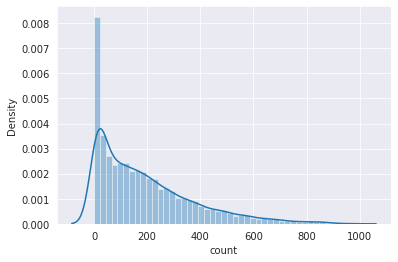

In [49]:
sns.distplot(train['count'])

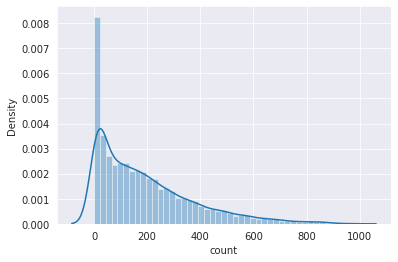

In [50]:
sns.distplot(train['count'])

In [51]:
x=train[['time', 'year_month', 'month_day', 'year', 'month', 'date',
       'hour', 'day', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual','count']]
y=train['count']

In [52]:
y=np.log(y)

In [55]:
class log_regression_select:
    def linear(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        lr=LinearRegression()
        lr.fit(x_train, y_train)
        y_pred=lr.predict(x_test)
        y_pred=pd.DataFrame(y_pred, columns=['y_pred'])
        y_pred=y_pred['y_pred'].apply(lambda x: np.exp(x))
        y_test_1=y_test.apply(lambda x: np.exp(x))

        train_score=lr.score(x_train, y_train)
        test_score=lr.score(x_test, y_test)
        mse=mean_squared_error(y_test_1, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def ridge(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        ridge = Ridge()
        ridge.fit(x_train, y_train)
        y_pred=ridge.predict(x_test)
        y_pred=pd.DataFrame(y_pred, columns=['y_pred'])
        y_pred=y_pred['y_pred'].apply(lambda x: np.exp(x))
        y_test_1=y_test.apply(lambda x: np.exp(x))

        train_score=ridge.score(x_train, y_train)
        test_score=ridge.score(x_test, y_test)
        mse=mean_squared_error(y_test_1, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def lasso(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        lasso = Lasso()
        lasso.fit(x_train, y_train)
        y_pred=lasso.predict(x_test)
        y_pred=pd.DataFrame(y_pred, columns=['y_pred'])
        y_pred=y_pred['y_pred'].apply(lambda x: np.exp(x))
        y_test_1=y_test.apply(lambda x: np.exp(x))


        train_score=lasso.score(x_train, y_train)
        test_score=lasso.score(x_test, y_test)
        mse=mean_squared_error(y_test_1, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def elasticnet(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        en = ElasticNet()
        en.fit(x_train, y_train)
        y_pred=en.predict(x_test)
        y_pred=pd.DataFrame(y_pred, columns=['y_pred'])
        y_pred=y_pred['y_pred'].apply(lambda x: np.exp(x))
        y_test_1=y_test.apply(lambda x: np.exp(x))

        train_score=en.score(x_train, y_train)
        test_score=en.score(x_test, y_test)
        mse=mean_squared_error(y_test_1, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def xgboost(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        xgb = xgboost.XGBRegressor()
        xgb.fit(x_train, y_train)
        y_pred=xgb.predict(x_test)
        y_pred=pd.DataFrame(y_pred, columns=['y_pred'])
        y_pred=y_pred['y_pred'].apply(lambda x: np.exp(x))
        y_test_1=y_test.apply(lambda x: np.exp(x))


        train_score=xgb.score(x_train, y_train)
        test_score=xgb.score(x_test, y_test)
        mse=mean_squared_error(y_test_1, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def lgbm(x,y):
         x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
         lgbm = lightgbm.LGBMRegressor()
         lgbm.fit(x_train, y_train)
         y_pred=lgbm.predict(x_test)
         y_pred=pd.DataFrame(y_pred, columns=['y_pred'])
         y_pred=y_pred['y_pred'].apply(lambda x: np.exp(x))
         y_test_1=y_test.apply(lambda x: np.exp(x))

         train_score=lgbm.score(x_train, y_train)
         test_score=lgbm.score(x_test, y_test)
         mse=mean_squared_error(y_test_1, y_pred)
         rmse=np.sqrt(mse)
         return rmse, train_score, test_score

    def catboost(x,y):
         x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
         cb = catboost.CatBoostRegressor()
         cb.fit(x_train, y_train)
         y_pred=cb.predict(x_test)
         y_pred=pd.DataFrame(y_pred, columns=['y_pred'])
         y_pred=y_pred['y_pred'].apply(lambda x: np.exp(x))
         y_test_1=y_test.apply(lambda x: np.exp(x))

         train_score=cb.score(x_train, y_train)
         test_score=cb.score(x_test, y_test)
         mse=mean_squared_error(y_test_1, y_pred)
         rmse=np.sqrt(mse)
         return rmse, train_score, test_score

In [56]:
class log_regression_model:
    def model_choice(x,y):
        model=pd.DataFrame(columns=['모델','rmse','train_score','test_score'])
        linear_rmse=log_regression_select.linear(x,y)[0]
        linear_train_score=log_regression_select.linear(x,y)[1]
        linear_test_score=log_regression_select.linear(x,y)[2]

        model=model.append({'모델':'linear', 'rmse':linear_rmse,
                            'train_score':linear_train_score,
                            'test_score':linear_test_score}, ignore_index=True)
    

        ridge_rmse=log_regression_select.ridge(x,y)[0]
        ridge_train_score=log_regression_select.ridge(x,y)[1]
        ridge_test_score=log_regression_select.ridge(x,y)[2]

        model=model.append({'모델':'ridge', 'rmse':ridge_rmse,
                            'train_score':ridge_train_score,
                            'test_score':ridge_test_score}, ignore_index=True)
        

        lasso_rmse=log_regression_select.lasso(x,y)[0]
        lasso_train_score=log_regression_select.lasso(x,y)[1]
        lasso_test_score=log_regression_select.lasso(x,y)[2]

        model=model.append({'모델':'lasso', 'rmse':lasso_rmse,
                            'train_score':lasso_train_score,
                            'test_score':lasso_test_score}, ignore_index=True)
        

        elasticnet_rmse=log_regression_select.elasticnet(x,y)[0]
        elasticnet_train_score=log_regression_select.elasticnet(x,y)[1]
        elasticnet_test_score=log_regression_select.elasticnet(x,y)[2]

        model=model.append({'모델':'elasticnet', 'rmse':elasticnet_rmse,
                            'train_score':elasticnet_train_score,
                            'test_score':elasticnet_test_score}, ignore_index=True)
        

        xgboost_rmse=log_regression_select.xgboost(x,y)[0]
        xgboost_train_score=log_regression_select.xgboost(x,y)[1]
        xgboost_test_score=log_regression_select.xgboost(x,y)[2]

        model=model.append({'모델':'xgboost', 'rmse':xgboost_rmse,
                            'train_score':xgboost_train_score,
                            'test_score':xgboost_test_score}, ignore_index=True)
        

        lgbm_rmse=log_regression_select.lgbm(x,y)[0]
        lgbm_train_score=log_regression_select.lgbm(x,y)[1]
        lgbm_test_score=log_regression_select.lgbm(x,y)[2]

        model=model.append({'모델':'lightgbm', 'rmse':lgbm_rmse,
                            'train_score':lgbm_train_score,
                            'test_score':lgbm_test_score}, ignore_index=True)
        

        catboost_rmse=log_regression_select.catboost(x,y)[0]
        catboost_train_score=log_regression_select.catboost(x,y)[1]
        catboost_test_score=log_regression_select.catboost(x,y)[2]

        model=model.append({'모델':'catboost', 'rmse':catboost_rmse,
                            'train_score':catboost_train_score,
                            'test_score':catboost_test_score}, ignore_index=True)
              
        model=model.sort_values('test_score', ascending=False)

        return model

In [ ]:
best=log_regression_model.model_choice(x,y)

In [58]:
best

,모델,rmse,train_score,test_score
5,lightgbm,2.946955,0.999992,0.999987
6,catboost,4.246841,0.999976,0.999961
4,xgboost,2.460625,0.999961,0.999960
1,ridge,577.006679,0.732961,0.731161
0,linear,577.040975,0.732961,0.731161
3,elasticnet,614.769461,0.724743,0.720762
2,lasso,658.374450,0.715350,0.710949


test_score가 0.978812에서 0.999987까지 높아진 것을 확인 할 수 있다.

rmse의 경우에도 26.445344에서 2.946955까지 떨어진 것을 확인 할 수 있다.